<h2 align='center'> Cyclistic: a bike-share program </h2>

<h4 align='center'> (Part 2: Data Analysis & Visualization) </h4>

### 1. Import libraries and datasets

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [3]:
# import all cleaned datasets

c_bt_202004 = pd.read_csv('~/PROJECTS/01_cyclistic_bike_share/cleaned_datasets/bt_202004.csv',
                          parse_dates = ["started_at", "ended_at"])
c_bt_202005 = pd.read_csv('~/PROJECTS/01_cyclistic_bike_share/cleaned_datasets/bt_202005.csv',
                          parse_dates = ["started_at", "ended_at"])
c_bt_202006 = pd.read_csv('~/PROJECTS/01_cyclistic_bike_share/cleaned_datasets/bt_202006.csv',
                          parse_dates = ["started_at", "ended_at"])
c_bt_202007 = pd.read_csv('~/PROJECTS/01_cyclistic_bike_share/cleaned_datasets/bt_202007.csv',
                          parse_dates = ["started_at", "ended_at"])
c_bt_202008 = pd.read_csv('~/PROJECTS/01_cyclistic_bike_share/cleaned_datasets/bt_202008.csv',
                          parse_dates = ["started_at", "ended_at"])
c_bt_202009 = pd.read_csv('~/PROJECTS/01_cyclistic_bike_share/cleaned_datasets/bt_202009.csv',
                          parse_dates = ["started_at", "ended_at"])
c_bt_202010 = pd.read_csv('~/PROJECTS/01_cyclistic_bike_share/cleaned_datasets/bt_202010.csv', 
                          parse_dates = ["started_at", "ended_at"])
c_bt_202011 = pd.read_csv('~/PROJECTS/01_cyclistic_bike_share/cleaned_datasets/bt_202011.csv', 
                          parse_dates = ["started_at", "ended_at"])
c_bt_202012 = pd.read_csv('~/PROJECTS/01_cyclistic_bike_share/cleaned_datasets/bt_202012.csv', 
                          parse_dates = ["started_at", "ended_at"])
c_bt_202101 = pd.read_csv('~/PROJECTS/01_cyclistic_bike_share/cleaned_datasets/bt_202101.csv', 
                          parse_dates = ["started_at", "ended_at"])
c_bt_202102 = pd.read_csv('~/PROJECTS/01_cyclistic_bike_share/cleaned_datasets/bt_202102.csv', 
                          parse_dates = ["started_at", "ended_at"])
c_bt_202103 = pd.read_csv('~/PROJECTS/01_cyclistic_bike_share/cleaned_datasets/bt_202103.csv', 
                          parse_dates = ["started_at", "ended_at"])

### 2. Aggregatre 12 datasets into a final dataset

In [4]:
frames = [c_bt_202004, c_bt_202005, c_bt_202006, c_bt_202007, c_bt_202008, c_bt_202009,
          c_bt_202010, c_bt_202011, c_bt_202012, c_bt_202101, c_bt_202102, c_bt_202103]

btrips = pd.concat(frames)

btrips.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,member_casual
0,A847FADBBC638E45,docked_bike,2020-04-26 17:45:14,2020-04-26 18:12:03,Eckhart Park,86,Lincoln Ave & Diversey Pkwy,152,member
1,5405B80E996FF60D,docked_bike,2020-04-17 17:08:54,2020-04-17 17:17:03,Drake Ave & Fullerton Ave,503,Kosciuszko Park,499,member
2,5DD24A79A4E006F4,docked_bike,2020-04-01 17:54:13,2020-04-01 18:08:36,McClurg Ct & Erie St,142,Indiana Ave & Roosevelt Rd,255,member
3,2A59BBDF5CDBA725,docked_bike,2020-04-07 12:50:19,2020-04-07 13:02:31,California Ave & Division St,216,Wood St & Augusta Blvd,657,member
4,27AD306C119C6158,docked_bike,2020-04-18 10:22:59,2020-04-18 11:15:54,Rush St & Hubbard St,125,Sheridan Rd & Lawrence Ave,323,casual


### 3. Analyze this dataset

#### (3-1) Divide this dataset based on member riders vs. casual riders

In [5]:
# create a sub-dataframe contains all membership rides
m_btrips = btrips.groupby(['member_casual']).get_group('member')

# create a sub dataframe contains all casual user rides
c_btrips = btrips.groupby(['member_casual']).get_group('casual')

***Note***: 

Since I've divided this dataset into two sub-dataframes: "m_btrips" for members and "c_btrips" for casual riders, I will drop *member_casual* columns in these two sub-dataframes.

In [6]:
# for m_biketrips: drop "member_casual" column
m_btrips = m_btrips.drop(['member_casual'], axis = 1)

# for c_biketrips: drop "member_casual" column
c_btrips = c_btrips.drop(['member_casual'], axis = 1)

#### (3-2) How many members versus casual riders have used Cyclistic bikes?

In [7]:
# create a function "values_percents" for autopct argument in plt.pie to display both percentages & actual values
def values_percents(values):
    def my_autopct(pct):  #for each pie wedge, plt.pie will auto-pass the percent value pct as the argument
        total = sum(values)
        val = pct*total/100  # use pct and total to get 
        return '{p:.1f}%\n({v:,.0f})'.format(p=pct,v=val)
    return my_autopct

<IPython.core.display.Javascript object>


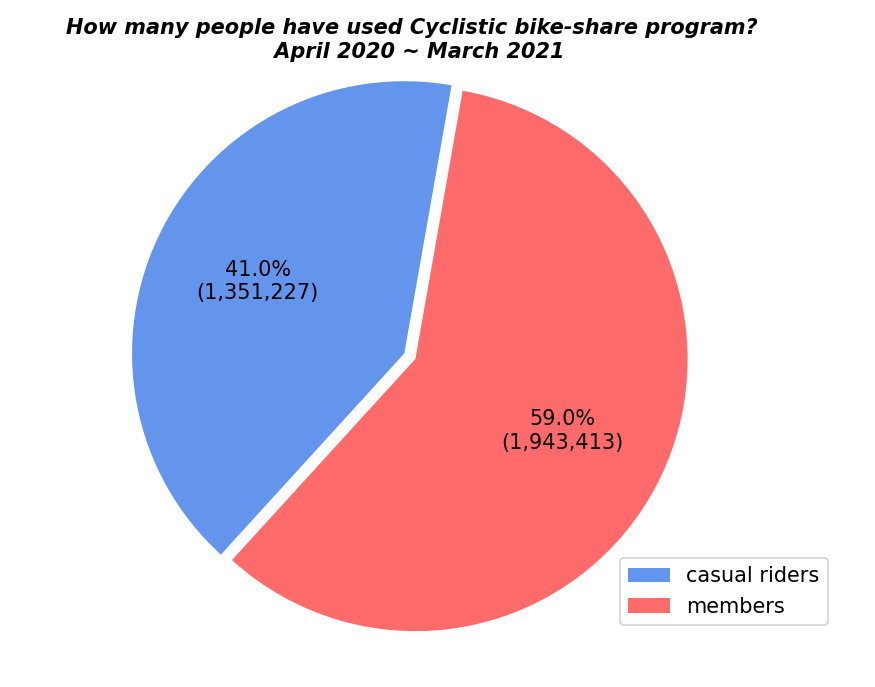

In [8]:
%matplotlib notebook

# plot: The total number of members versus the total number of casual riders
plt.figure(figsize=(7, 5.5))

plt.pie([len(c_btrips), len(m_btrips)],
        explode = [0.05, 0],
        colors = ['#6495ed', '#ff6a6a'],
        startangle = 80, 
        radius = 1.1, 
        autopct = values_percents([len(c_btrips), len(m_btrips)]),
        textprops = {'fontsize' : 'large'})

plt.legend(labels = ['casual riders', 'members'], 
           loc = (0.83, 0.07), 
           fontsize = 'large')
plt.title("How many people have used Cyclistic bike-share program? \n April 2020 ~ March 2021",
          y = 0.97,
          fontsize = 'large', 
          fontstyle = 'italic', 
          fontweight = 'bold')

plt.tight_layout()

plt.show()

#### (3-3) How many members and/or casual riders have used Cyclistic bikes monthly?

In [9]:
# for members: group by months
m_12_months = m_btrips.groupby(m_btrips['started_at'].dt.month_name())

# for casual riders: group by months
c_12_months = c_btrips.groupby(c_btrips['started_at'].dt.month_name())

<IPython.core.display.Javascript object>


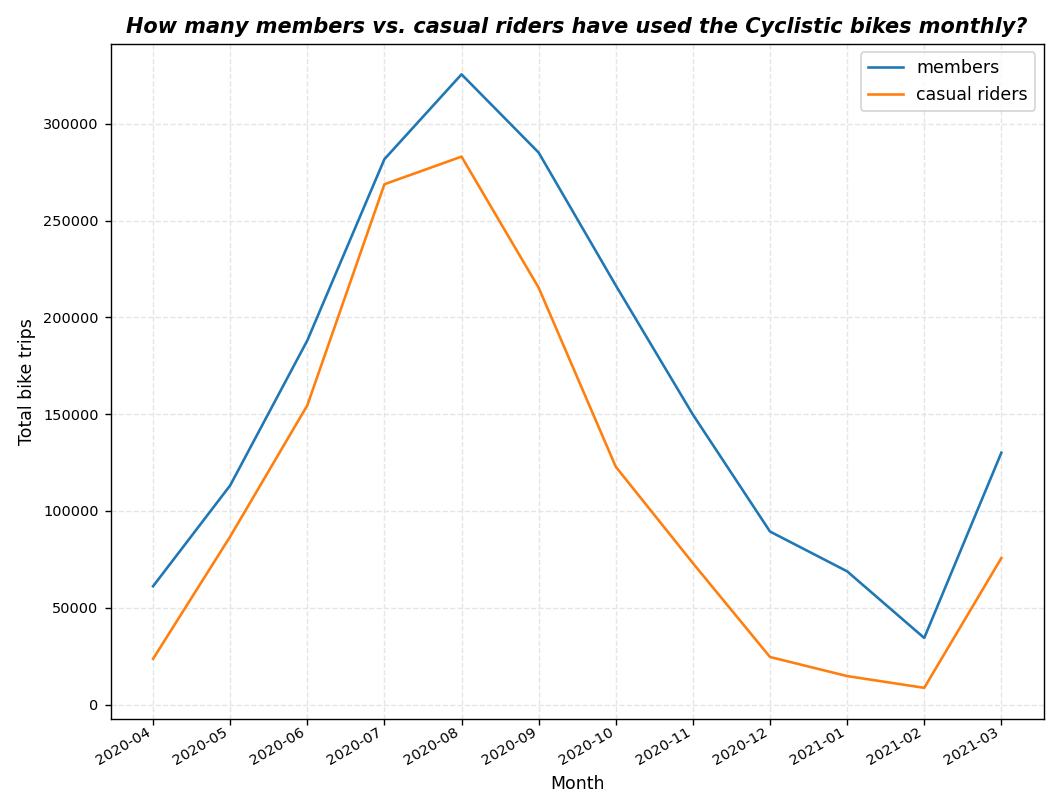

In [10]:
%matplotlib notebook

# get counts of bike trips by month
months = ['April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December', 'January', 
          'February', 'March']
months_year = ['2020-04', '2020-05', '2020-06', '2020-07', '2020-08', '2020-09', '2020-10', '2020-11', '2020-12', 
               '2021-01', '2021-02', '2021-03']
m_12_months_trips = m_12_months['ride_id'].count().reindex(index=months)
c_12_months_trips = c_12_months['ride_id'].count().reindex(index=months)

# plot: How many members and/or casual riders have used Cyclistic bike share program?
plt.figure(figsize = (8.5, 6.5))

plt.plot(months_year, m_12_months_trips.values)
plt.plot(months_year, c_12_months_trips.values)

plt.title("How many members vs. casual riders have used the Cyclistic bikes monthly?",  
          fontsize = 'large', 
          fontstyle = 'italic', 
          fontweight = 'bold')
plt.xlabel("Month", 
           fontsize = 'medium')
plt.xticks(fontsize = 'small', 
           ha = 'right', 
           va = 'center_baseline')
plt.ylabel("Total bike trips", 
           fontsize = 'medium')
plt.yticks(fontsize = 'small', 
           ha = 'right', 
           va = 'center_baseline')
plt.legend(labels = ['members', 'casual riders'])

plt.gcf().autofmt_xdate()
plt.grid(color = '#e5e5e5', 
         linestyle = '--')
plt.tight_layout()

plt.show()

#### (3-4) Do members versus casual riders have preference on types of bikes?

<IPython.core.display.Javascript object>


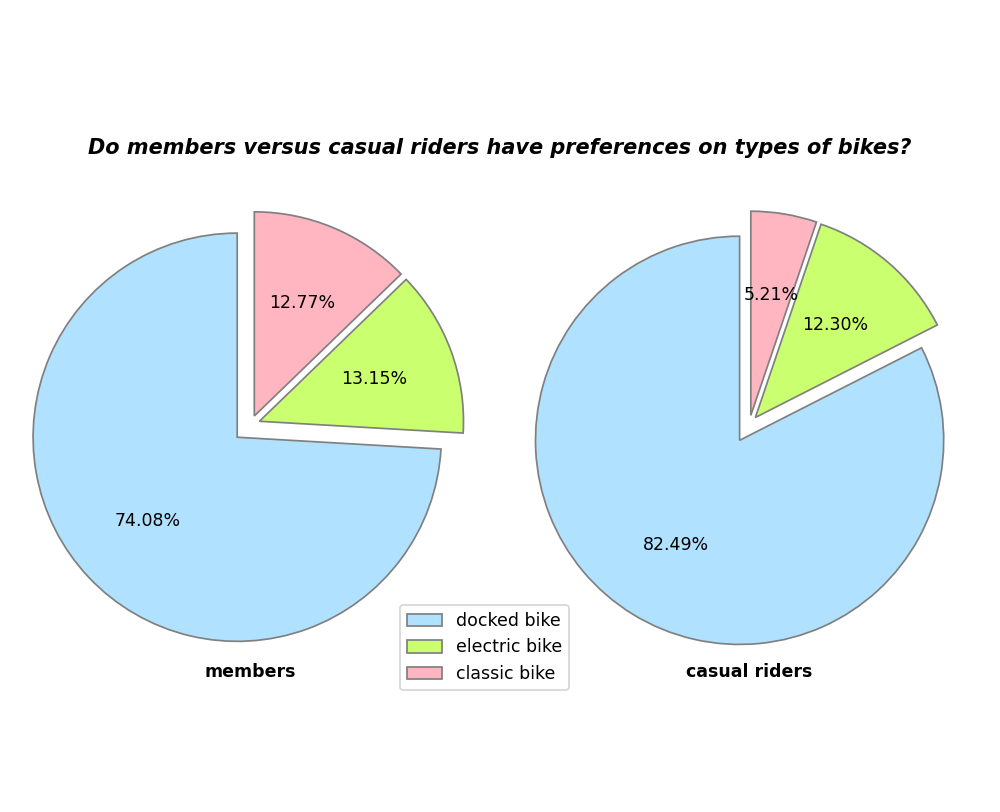

In [12]:
%matplotlib notebook

# plot: The preference that members versus casual riders based on the types of bikes

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 6.5))

# left plot: members
ax1.pie(m_btrips['rideable_type'].value_counts(),
        explode = [0.1, 0.05, 0.05],
        wedgeprops = {'edgecolor':'grey'},
        colors = ['#b0e2ff', '#caff70', '#ffb6c1'],
        radius = 1.1, 
        startangle = 90,
        autopct = "%1.2f%%")

ax1.set_xlabel("members", 
               loc = 'center', 
               fontweight = 'bold', 
               fontsize = 'medium')

# right plot: casual members
ax2.pie(c_btrips['rideable_type'].value_counts(),
        explode = [0.1, 0.05, 0.05],
        wedgeprops = {'edgecolor':'grey'},
        colors = ['#b0e2ff', '#caff70', '#ffb6c1'],
        radius = 1.1, 
        startangle = 90,
        autopct = "%1.2f%%")

ax2.set_xlabel("casual riders", 
               loc = 'center', 
               fontweight = 'bold', 
               fontsize = 'medium')

fig.legend(labels = ['docked bike', 'electric bike', 'classic bike'], 
           loc = (0.4, 0.15), 
           fontsize = 'medium')
fig.suptitle("Do members versus casual riders have preferences on types of bikes?", 
             y = 0.83, 
             fontsize = 'large', 
             fontweight = 'bold', 
             fontstyle = 'italic')

plt.tight_layout(w_pad = 2.0)

plt.show()

#### (3-5) How long do bike ride lengths usually last? 

In [13]:
# for members:
# drop invalid records if the end times is earlier or equal to the start times 
m_btrips = m_btrips[m_btrips['ended_at'] > m_btrips['started_at']]

# create a column "ride_length_minutes" by subtracting "ended_at" from "started_at"
ride_length = m_btrips['ended_at'] - m_btrips['started_at']
m_btrips.insert(4, "ride_length_minutes", ride_length.dt.total_seconds() / 60)

In [14]:
# for casual riders: 
# drop invalid records if the end times is earlier or equal to the start times
c_btrips = c_btrips[c_btrips['ended_at'] > c_btrips['started_at']]

# create a column "ride_length_minutes" by subtracting "ended_at" from "started_at"
ride_length = c_btrips['ended_at'] - c_btrips['started_at']
c_btrips.insert(4, "ride_length_minutes", ride_length.dt.total_seconds() / 60)

In [15]:
# create a function to count the numbers of bike rides based on the lengths
from collections import Counter
c = Counter()

def minutes_category(ser):
    for s in ser:
        if s <= 1: c.update("1")  # category 1: less than or equal to 1 mintue
        elif 1 < s <= 10: c.update("2")  # category 2: less than or equal to 10 minutes
        elif 10 < s <= 30: c.update("3")  # category 3: less than or equal to 30 minutes
        elif 30 < s <= 60: c.update("4")  # category 4: less than or equal to 60 minutes
        elif 60 < s <= 720: c.update("5")  # category 5: less than or equal to 12 hours
        elif 720 < s <= 1440: c.update("6")  # category 6: less than or equal to 24 hours
        elif 1440 < s <= 43200: c.update("7")  # category 7: more than 1 day, but less than 30 days
        else:
            c.update("8")  # category 8: more than 30 days
    return c

In [16]:
# get a sorted Counter of members' ride lengths
m_ride_length_minutes = dict(sorted(minutes_category(m_btrips['ride_length_minutes']).items()))

# get a sorted Counter of casual riders' ride lengths
c_ride_length_minutes = dict(sorted(minutes_category(c_btrips['ride_length_minutes']).items()))

In [17]:
# create a function to display values for each category on barplots by each ax
from itertools import chain

def display_pct_on_subbar(ax, values1, values2):
    ax_values = [x for z in zip(values1, values2) for x in z]  # get all values for each ax
    for p in ax.patches:
        v = '{:,.0f}'.format(p.get_height())
        w = p.get_width()
        h = p.get_height()
        x = p.get_x() + w / 2
        y = p.get_y() + h * 1.01
        ax.annotate(v, (x,y), ha = 'center', fontsize = 'x-small', color='blue')

<IPython.core.display.Javascript object>


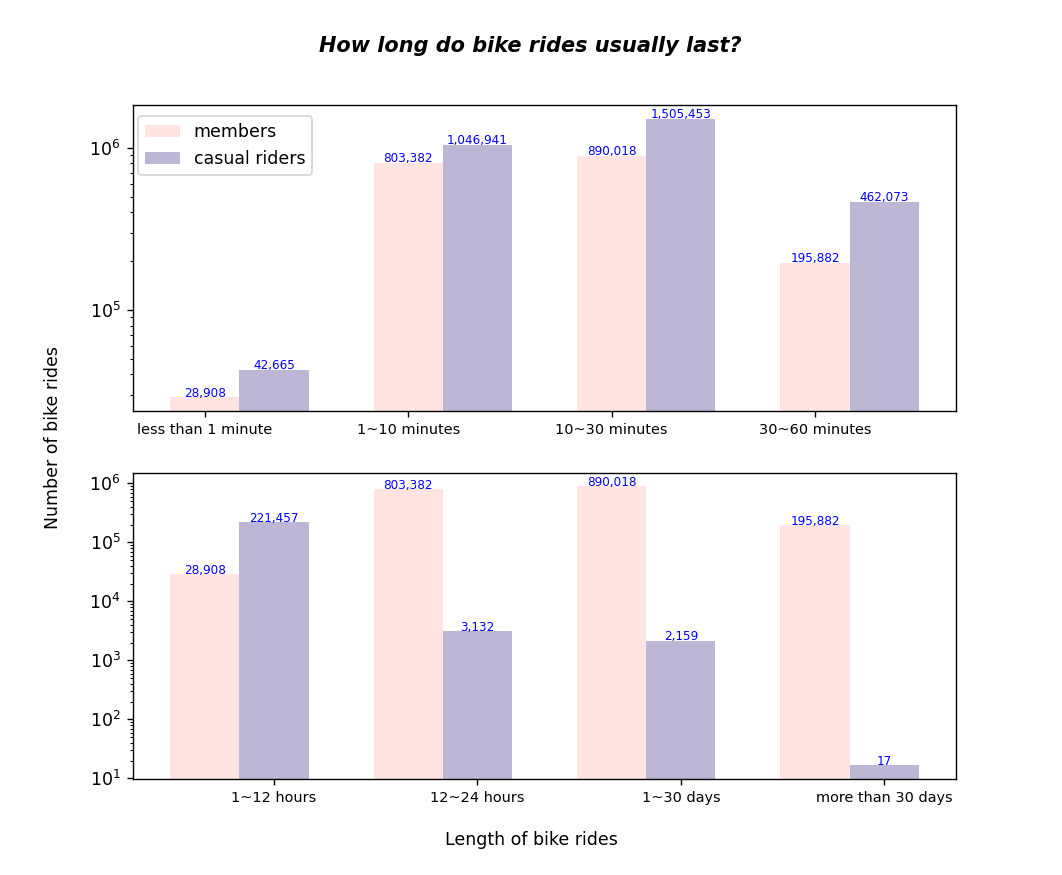

In [19]:
%matplotlib notebook

# plot: How long do bike rides usually last?

# get all values for members' and casual riders' bike lengths
m_values = [mv for mv in m_ride_length_minutes.values()]
c_values = [cv for cv in c_ride_length_minutes.values()]

# divide all lengths of bike rides into 2 cateogories
categories_1 = ['less than 1 minute', '1~10 minutes', '10~30 minutes', '30~60 minutes']
categories_2 = ['1~12 hours', '12~24 hours', '1~30 days', 'more than 30 days']

fig, (ax1, ax2) = plt.subplots(nrows = 2, figsize=(8.5, 7))

# subplot 1:
ax1_xindexes = np.arange(len(categories_1))
ax1_m_values = m_values[:4]
ax1_c_values = c_values[:4]

ax1.bar(ax1_xindexes, ax1_m_values, 
        width = 0.34, 
        label = 'members', 
        color = '#ffe4e1', 
        log = True)
ax1.bar(ax1_xindexes+0.34, ax1_c_values, 
        width = 0.34, 
        label = 'casual riders', 
        color = '#bdb6d5', 
        log = True)

ax1.set_xticks(ticks = ax1_xindexes)
ax1.set_xticklabels(labels = categories_1, 
                    fontdict={'ha':'center', 'va':'top', 'fontsize':'small'})

# display percentages on subplot1 using 'display_pct_on_subbar' function above
display_pct_on_subbar(ax1, ax1_m_values, ax1_c_values)

# subplot 2:
ax2_indexes = np.arange(len(categories_2))
ax2_m_values = m_values[:4]
ax2_c_values = c_values[4:]

ax2.bar(ax2_indexes - 0.34, ax2_m_values, 
        width = 0.34, 
        label = 'members', 
        color = '#ffe4e1', 
        log = True)
ax2.bar(ax2_indexes, ax2_c_values, 
        width = 0.34, 
        label='casual riders', 
        color = '#bdb6d5', 
        log=True)

ax2.set_xticks(ticks = ax2_indexes)
ax2.set_xticklabels(labels = categories_2, 
                    fontdict={'ha':'center', 'va':'top', 'fontsize':'small'})

# display percentages on subplot2 using 'display_pct_on_subbar' function above
display_pct_on_subbar(ax2, ax2_m_values, ax2_c_values)

fig.legend(labels = ['members', 'casual riders'], 
           loc=(0.13, 0.8), 
           fontsize='medium')
fig.text(0.5, 0.04, 
         "Length of bike rides", 
         ha="center", 
         va="center")
fig.text(0.05, 0.5, 
         "Number of bike rides", 
         ha="center", 
         va="center", 
         rotation = 90)
fig.text(0.3, 0.94, 
         'How long do bike rides usually last?', 
         fontsize = 'large', 
         fontstyle = 'italic', 
         fontweight = 'semibold')

fig.show()

#### (3-6) How many bike rides initiated weekdays versus weekends?

In [20]:
# create a column "started_at_day_name" to get the day names of the start day of each bike ride
m_btrips.insert(3, "started_at_day_name", m_btrips['started_at'].dt.day_name())

# create a column "started_at_day_name" to get the day names of the start day of each bike ride
c_btrips.insert(3, "started_at_day_name", c_btrips['started_at'].dt.day_name())

<IPython.core.display.Javascript object>


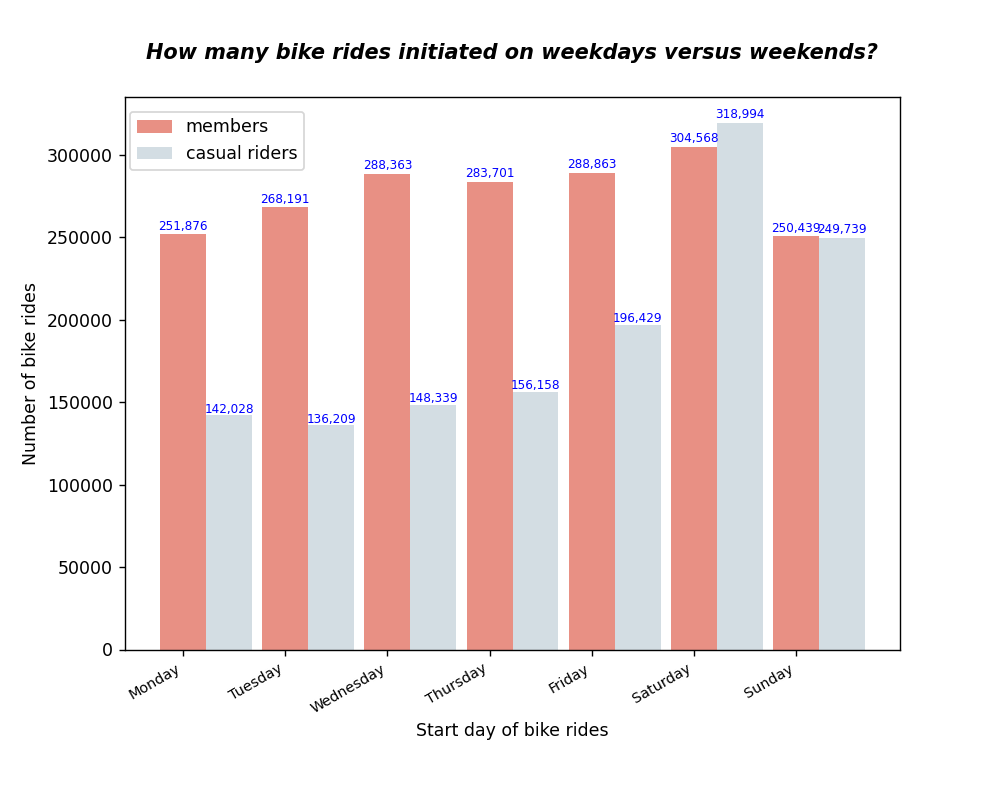

In [21]:
%matplotlib notebook

# plot: How many bike rides initiated based on days of a week?

days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
m_startdays = m_btrips['started_at_day_name'].value_counts().reindex(index=days)
c_startdays = c_btrips['started_at_day_name'].value_counts().reindex(index=days)

x_indexes = np.arange(len(days))
b_width = 0.45

fig, ax = plt.subplots(figsize = (8, 6.5))

# first, plot data for members
ax.bar(x_indexes, m_startdays.values, 
       width = b_width, 
       label = 'members', 
       color = '#e89084')

# then, plot data for casual riders
ax.bar(x_indexes + b_width, c_startdays.values, 
       width = b_width, 
       label = 'casual riders', 
       color = '#d3dde3')

# display percentages using 'display_pct_on_subbar' function above
display_pct_on_subbar(ax, m_startdays.values, c_startdays.values)

ax.set_xticks(ticks = x_indexes)
ax.set_xticklabels(labels = days, 
                   fontdict = {'ha':'left', 'va':'top', 'fontsize':'small'})

ax.set_title("How many bike rides initiated on weekdays versus weekends?", 
             y = 1.05,
             fontsize = 'large', 
             fontstyle = 'italic', 
             fontweight = 'semibold')
ax.set_xlabel("Start day of bike rides")
ax.set_ylabel("Number of bike rides")

fig.autofmt_xdate()
fig.legend(loc = (0.13, 0.79))

fig.show()

#### (3-7) What are the average length of bike rides on weekdays versus weekends?

In [22]:
# for members: get the average bike ride lengths initiated based on days
m_by_days = m_btrips.groupby(['started_at_day_name'])
m_avg_rl = m_by_days['ride_length_minutes'].agg('mean').reindex(index=days)

# for casual riders: get the average bike ride lengths initiated based on days
c_by_days = c_btrips.groupby(['started_at_day_name'])
c_avg_rl = c_by_days['ride_length_minutes'].agg('mean').reindex(index=days)

<IPython.core.display.Javascript object>


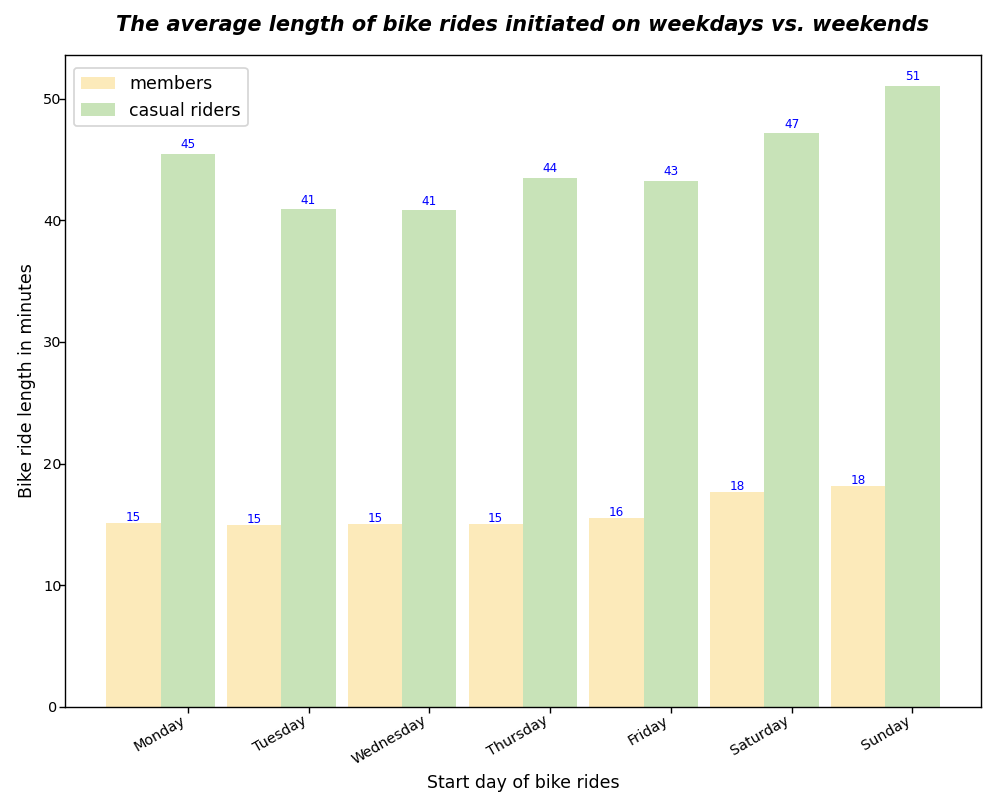

In [24]:
%matplotlib notebook

# plot: What are the average bike ride length initiated based on days of a week?

x_indexes = np.arange(len(days))
b_width = 0.45

plt.figure(figsize=(8, 6.5))

# first, plot data for members
plt.bar(x_indexes - b_width, m_avg_rl.values, 
        width = b_width, 
        label = 'members', 
        color='#fceaba')

# then, plot data for casual riders
plt.bar(x_indexes, c_avg_rl.values, 
        width = b_width, 
        label = 'casual riders', 
        color = '#c8e3b8')

# display percentages using 'display_pct_on_subbar' function above
display_pct_on_subbar(plt.gca(), m_avg_rl.values, c_avg_rl.values)

plt.xticks(ticks = x_indexes, 
           labels = days, 
           fontsize = 'small', 
           ha = 'center', 
           va = 'center_baseline')
plt.xlabel("Start day of bike rides", 
           fontsize = 'medium')
plt.yticks(fontsize = 'small', 
           ha = 'center', 
           va = 'center_baseline')
plt.ylabel("Bike ride length in minutes", 
           fontsize = 'medium')
plt.title("The average length of bike rides initiated on weekdays vs. weekends", 
          y = 1.02,
          fontsize = 'large', 
          fontstyle = 'italic', 
          fontweight = 'semibold')
plt.legend(loc = (0.01, 0.89))

plt.gcf().autofmt_xdate()
plt.tight_layout()

fig.show()

#### (3-8) What are the top 5 start bike stations used by members versus casual riders?

In [26]:
# top 5 start bike stations used by members
m_stations = m_btrips.groupby(['start_station_id'])['ride_id'].count().sort_values(ascending=False)[:5]

# top 5 start bike stations used by casual riders
c_stations = c_btrips.groupby(['start_station_id'])['ride_id'].count().sort_values(ascending=False)[:5]

In [27]:
# create a function "stations_ids_names" to retrieve station names using station ids
def stations_ids_names(ids, df):
    names = []
    for s_id in ids:
        row = df[df['start_station_id'] == s_id].iloc[0]
        s_name = row['start_station_name']
        names.append(s_name)
    return names

In [28]:
# for members: get station names
m_stations_names = stations_ids_names(m_stations.index, m_btrips)

# for casual riders: get station names
c_stations_names = stations_ids_names(c_stations.index, c_btrips)

<IPython.core.display.Javascript object>


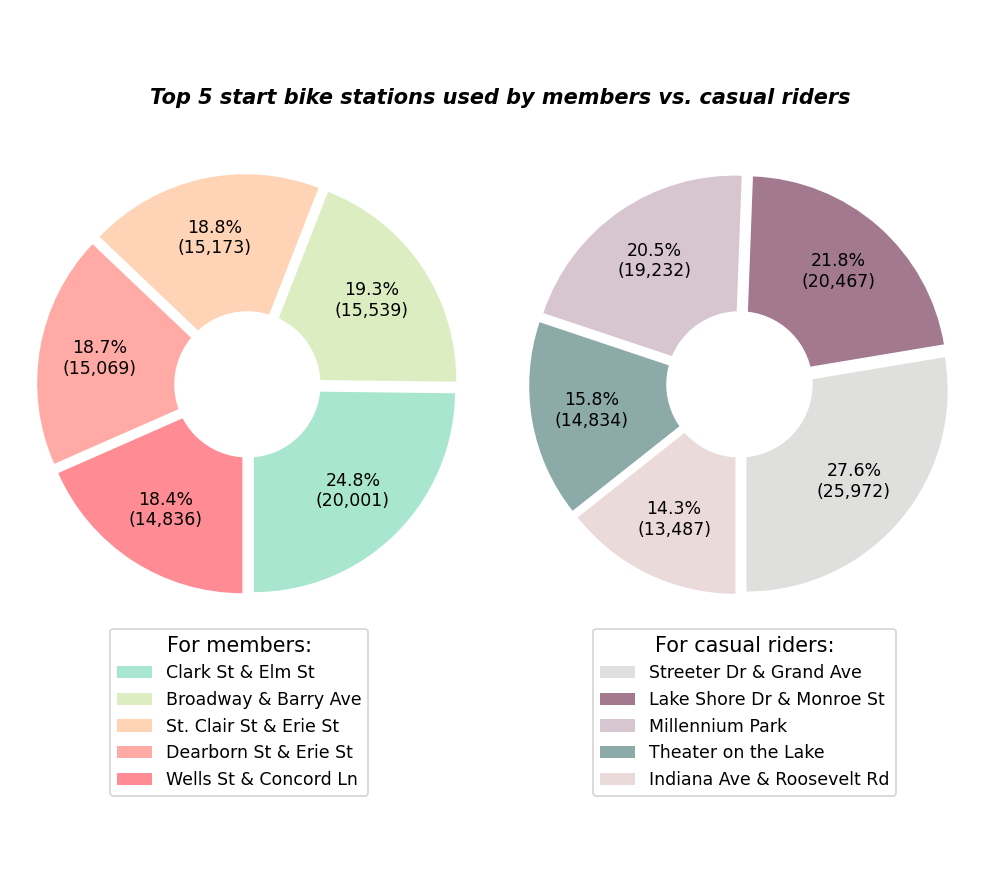

In [29]:
%matplotlib notebook

#plot: What are the top 5 start bike stations used by members versus casual riders?

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (8, 7))

# first, plot data for members
ax1.pie(m_stations.values,
        labels = m_stations_names, 
        colors = ['#a8e6cf', '#dcedc1', '#ffd3b6', '#ffaaa5', '#ff8b94'], 
        explode = (0.05, 0.05, 0.05, 0.05, 0.05), 
        startangle = -90,
        radius = 1.1, 
        labeldistance = None,
        autopct = values_percents(m_stations.values),  # func "values_percents" - display percentages & values
        pctdistance = 0.7)

# draw circle
circle1 = plt.Circle((0, 0), 0.4, fc = 'white')
ax1.add_artist(circle1)  # Adding Circle in Pie chart

# then, plot data for casual riders
ax2.pie(c_stations.values,
        labels = c_stations_names, 
        colors = ['#dfdfde', '#a2798f', '#d7c6cf', '#8caba8', '#ebdada'],
        explode = (0.05, 0.05, 0.05, 0.05, 0.05), 
        startangle = -90,
        radius = 1.1, 
        labeldistance = None,
        autopct = values_percents(c_stations.values),  # func "values_percents" - display percentages & values
        pctdistance = 0.7)

# draw circle
circle2 = plt.Circle((0, 0), 0.4, fc = 'white')
ax2.add_artist(circle2)  # Adding Circle in Pie chart

ax1.legend(title = "For members:", title_fontsize = 'large',
           loc = (0.2, -0.4), 
           fontsize = 'medium')
ax2.legend(title = "For casual riders:", title_fontsize = 'large',
           loc = (0.18, -0.4), 
           fontsize = 'medium')
fig.suptitle("Top 5 start bike stations used by members vs. casual riders", 
             y = 0.9, 
             fontsize = 'large', 
             fontweight = 'bold', 
             fontstyle = 'italic')

fig.tight_layout(w_pad = 2.0)
fig.subplots_adjust(top=1.1)

fig.show()